In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

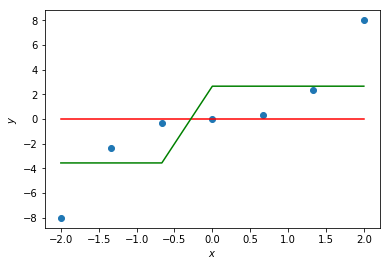

In [17]:

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.plot(X, [0 for i in range(len(X))], c="r")
plt.plot(X, [bb for i in range(len(b))]+[aa for i in range(len(a))], c="g")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [12]:
def reg_tree(x, y):
    for a,i in enumerate(x):
        if i >= 0:
            yield y[a]

In [13]:
a = [i for i in reg_tree(X, y)]

In [14]:
def reg_tree2(x, y):
    for a,i in enumerate(x):
        if i < 0:
            yield y[a]

In [15]:
b = [i for i in reg_tree2(X, y)]


In [16]:
aa = sum(a)/len(a)
bb = sum(b)/len(b)

## 2 вопрос 
7

In [18]:
data = pd.read_csv('..\week2\mlbootcamp5_train.csv', sep=';',
                    index_col='id')

In [19]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [20]:
data['age_years'] = (data['age'] // 365.25).astype(int)


In [21]:
dums = pd.get_dummies(data['cholesterol'], prefix='cholesterol')
dums2 = pd.get_dummies(data['gluc'], prefix='gluc')

In [22]:
for i in dums2:
    data[i] = dums2[i]

In [23]:
for i in dums:
    data[i] = dums[i]

In [24]:
y = data['cardio']

In [25]:
data = data.drop(['gluc'], axis=1)
data = data.drop(['cholesterol'], axis=1)
# data = data.drop(['age'], axis=1)
data = data.drop(['cardio'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.3, random_state = 17)

In [28]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)

In [29]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=data.columns, filled=True)

## Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")

weight, height, gluc=3 

smoke, age, gluc=3

age, weight, chol=3

### age, ap_hi, chol=3

In [31]:
y_pred = tree.predict(X_valid)

In [32]:
accuracy_score(y_valid, y_pred)


0.72128571428571431

In [33]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)

In [34]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
tree_grid.grid_scores_

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.71551, std: 0.00363, params: {'max_depth': 2},
 mean: 0.72771, std: 0.00485, params: {'max_depth': 3},
 mean: 0.73049, std: 0.00453, params: {'max_depth': 4},
 mean: 0.73096, std: 0.00523, params: {'max_depth': 5},
 mean: 0.73198, std: 0.00506, params: {'max_depth': 6},
 mean: 0.73037, std: 0.00360, params: {'max_depth': 7},
 mean: 0.72969, std: 0.00392, params: {'max_depth': 8},
 mean: 0.72822, std: 0.00475, params: {'max_depth': 9},
 mean: 0.72590, std: 0.00490, params: {'max_depth': 10}]

In [36]:
means = [float(str(i).split(' ')[1].replace(',', '')) for i in tree_grid.grid_scores_]


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [37]:
depth = [i for i in range(2, 11)]

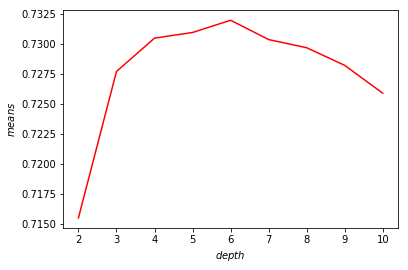

In [38]:
plt.plot(depth, means, c="r")
plt.ylabel(r'$means$')
plt.xlabel(r'$depth$');

In [39]:
y_pred = tree_grid.predict(X_valid)

In [40]:
accuracy_score(y_valid, y_pred)

0.72580952380952379

## Имеется ли на кривой валидации по максимальной глубине дерева пик accuracy, если перебирать max_depth от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?

да, да
### да, нет
нет, да

нет, нет

In [41]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,gluc_1,gluc_2,gluc_3,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,55,1,0,0,0,0,1
2,18857,1,165,64.0,130,70,0,0,0,51,1,0,0,0,0,1
3,17623,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


In [42]:
data['[45,50)'] = data['age_years']
data['[50,55)'] = data['age_years']
data['[55,60)'] = data['age_years']
data['[60,65)'] = data['age_years']

In [43]:
data['[45,50)'] = data['[45,50)'].apply(lambda x: 1 if x >=45 and x <50 else 0)
data['[50,55)'] = data['[50,55)'].apply(lambda x: 1 if x >=50 and x <55 else 0)
data['[55,60)'] = data['[55,60)'].apply(lambda x: 1 if x >=55 and x <60 else 0)
data['[60,65)'] = data['[60,65)'].apply(lambda x: 1 if x >=60 and x <65 else 0)

In [44]:
data['[120,140)'] = data['ap_hi']
data['[140,160)'] = data['ap_hi']
data['[160,180)'] = data['ap_hi']


In [45]:
data['[120,140)'] = data['[120,140)'].apply(lambda x: 1 if x >=120 and x <140 else 0)
data['[140,160)'] = data['[140,160)'].apply(lambda x: 1 if x >=140 and x <160 else 0)
data['[160,180)'] = data['[160,180)'].apply(lambda x: 1 if x >=160 and x <180 else 0)

In [46]:
df = data[['[120,140)', '[140,160)', '[160,180)', '[45,50)','[50,55)', '[55,60)', '[60,65)']]

In [47]:
df['cholesterol_1'] = data['cholesterol_1']
df['cholesterol_2'] = data['cholesterol_2']
df['cholesterol_3'] = data['cholesterol_3']

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [48]:
df['male'] = data['gender']

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df['male'] = df['male'].apply(lambda x: 1 if x == 2 else 0)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df['smoke'] = data['smoke']

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df.loc[13]

[120,140)        0
[140,160)        0
[160,180)        0
[45,50)          1
[50,55)          0
[55,60)          0
[60,65)          0
cholesterol_1    1
cholesterol_2    0
cholesterol_3    0
male             0
smoke            0
Name: 13, dtype: int64

In [52]:
df.columns[3:7]

Index(['[45,50)', '[50,55)', '[55,60)', '[60,65)'], dtype='object')

In [56]:
df.loc[461]

[120,140)        0
[140,160)        0
[160,180)        0
[45,50)          0
[50,55)          0
[55,60)          0
[60,65)          0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
male             0
smoke            0
Name: 461, dtype: int64

In [ ]:
for i in df.index:
    hi = 0
    age = 0
    for a in df.columns[0:3]:
        hi += df[a].loc[i]
    if hi == 0: 
        df.loc[i] = 0
        print('hi == 0 {}'.format(i))
        
    for b in df.columns[3:7]:
        age += df[b].loc[i]
    if age == 0: 
        df.loc[i] = 0
        print('age == 0 {}'.format(i))

D:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


hi == 0 0
age == 0 0
hi == 0 4
age == 0 4
hi == 0 13
age == 0 13
hi == 0 14
age == 0 14
age == 0 18
hi == 0 21
age == 0 21
age == 0 23
hi == 0 27
age == 0 27
hi == 0 28
age == 0 28
hi == 0 33
age == 0 33
age == 0 36
age == 0 39
hi == 0 44
age == 0 44
hi == 0 54
age == 0 54
hi == 0 56
age == 0 56
age == 0 64
hi == 0 65
age == 0 65
age == 0 68
hi == 0 71
age == 0 71
age == 0 73
hi == 0 74
age == 0 74
hi == 0 77
age == 0 77
hi == 0 79
age == 0 79
hi == 0 94
age == 0 94
hi == 0 97
age == 0 97
age == 0 103
hi == 0 116
age == 0 116
age == 0 127
hi == 0 129
age == 0 129
hi == 0 131
age == 0 131
hi == 0 135
age == 0 135
hi == 0 136
age == 0 136
hi == 0 137
age == 0 137
age == 0 141
hi == 0 142
age == 0 142
age == 0 143
hi == 0 144
age == 0 144
hi == 0 145
age == 0 145
hi == 0 148
age == 0 148
hi == 0 162
age == 0 162
hi == 0 163
age == 0 163
hi == 0 168
age == 0 168
hi == 0 178
age == 0 178
hi == 0 192
age == 0 192
hi == 0 202
age == 0 202
age == 0 203
age == 0 213
hi == 0 215
age == 0 215
hi 

In [121]:
df.loc[2261].apply(lambda x: 0)

[120,140)        0
[140,160)        0
[160,180)        0
[45,50)          0
[50,55)          0
[55,60)          0
[60,65)          0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
male             0
smoke            0
Name: 2261, dtype: int64